Name of Student: RAJAN SHAHURAO BANGAR
Roll No.         21114015
Course:          Applied Machine Learning
Instructor:      Dr.VEENA BANSAL
Project Name:    Machine Failure Prediction

In [2]:
import numpy as np 
import pandas as pd 
import os

In [3]:
import pandas as pd

In [4]:
! pip install imbalanced-learn==0.7.0
#Latest imbalanced-learn==0.9.1 doesn't work here for this program or notebook!!!
import imblearn
print(imblearn.__version__)

0.7.0


In [5]:
df=pd.read_csv(f"./predictive_maintenance.csv")

In [6]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [8]:
df.apply(lambda x: x.nunique())

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64

In [9]:
df.iloc[:,-1].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

# Covering Memory Leak
 ### Can not use both Target and Failure Type at the same time. As both of them together will have Data leak. 


In [10]:
df.drop(df.columns[:2],axis=1,inplace=True)

In [11]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


# EDA

In [12]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
matplotlib.style.use('ggplot')

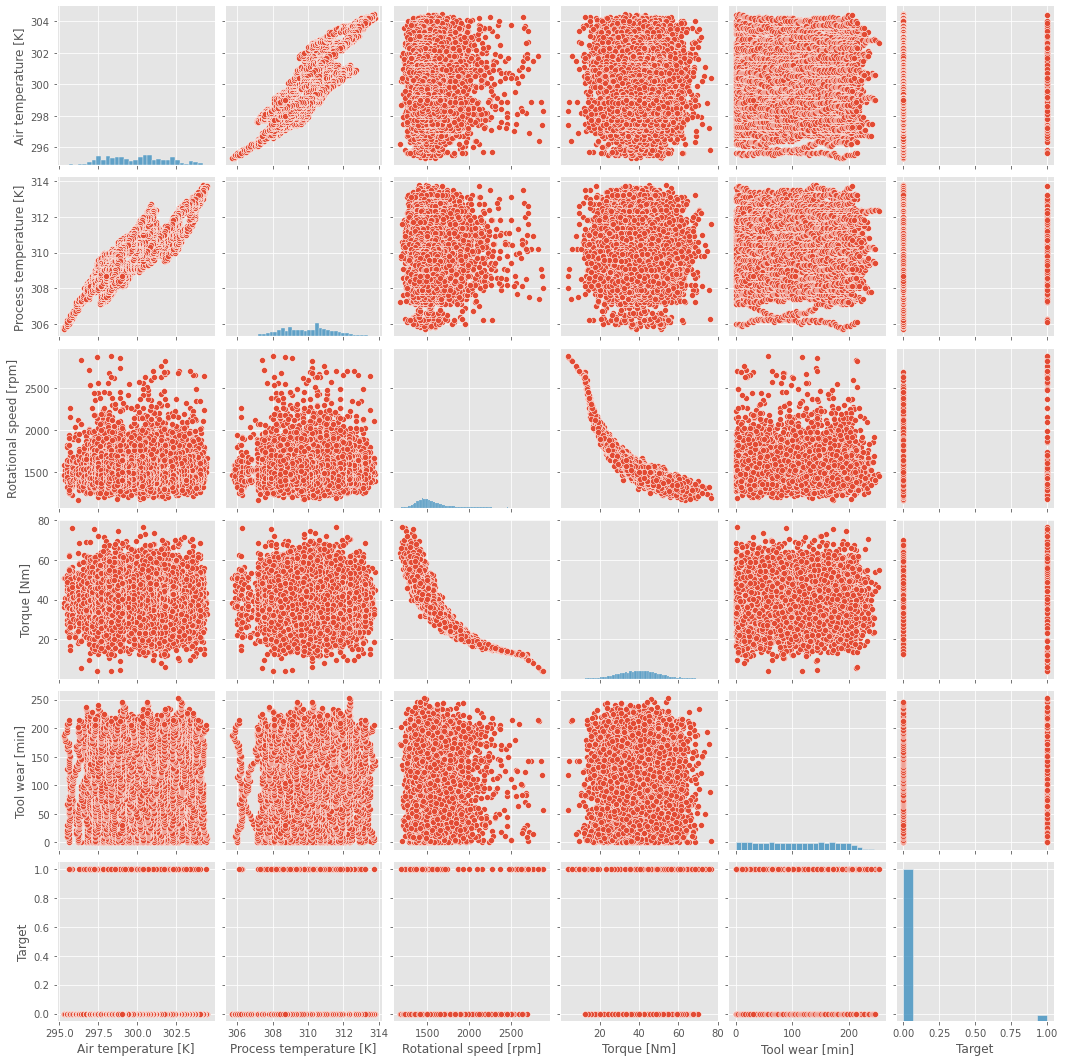

In [13]:
sns.pairplot(df)

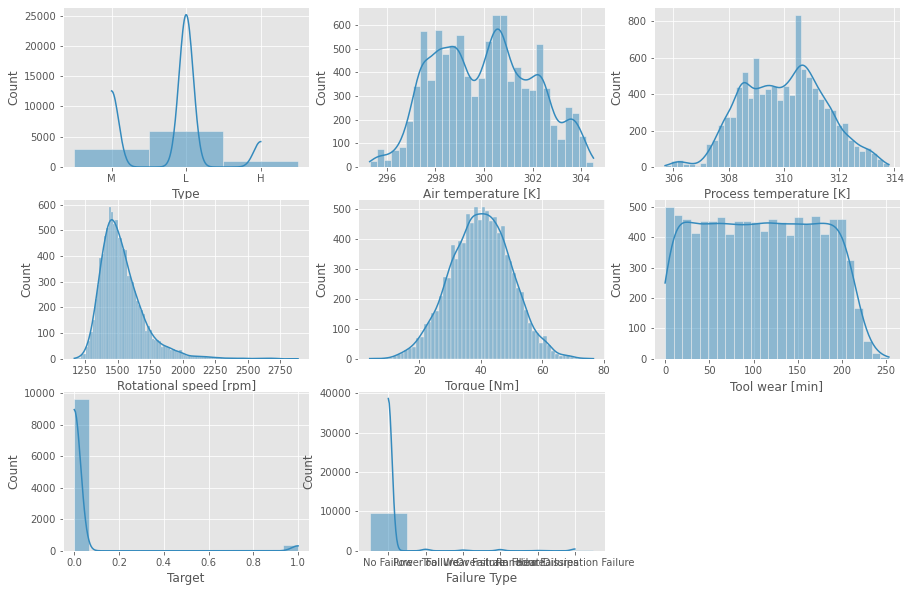

In [14]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(df[col],kde=True)

In [15]:
from sklearn .preprocessing import LabelEncoder
encode=LabelEncoder()

In [16]:
df.loc[:,df.columns[-1]]=encode.fit_transform(df.loc[:,df.columns[-1]])

In [17]:
encode.classes_

array(['Heat Dissipation Failure', 'No Failure', 'Overstrain Failure',
       'Power Failure', 'Random Failures', 'Tool Wear Failure'],
      dtype=object)

In [18]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,1
1,L,298.2,308.7,1408,46.3,3,0,1
2,L,298.1,308.5,1498,49.4,5,0,1
3,L,298.2,308.6,1433,39.5,7,0,1
4,L,298.2,308.7,1408,40.0,9,0,1


In [19]:
from sklearn.model_selection import train_test_split
X_train , X_test = train_test_split(df,test_size = 0.3)

In [20]:
df = X_train

In [21]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
7879,M,300.8,312.3,1535,40.3,71,0,1
1919,L,298.2,308.0,1658,30.0,3,0,1
6524,L,301.1,310.4,1874,24.8,47,0,1
2847,L,300.4,309.3,1525,39.6,202,0,1
7464,L,300.1,311.3,1535,42.3,92,0,1


## Need to min max Scaler on Roatation speed and Standard scaller on all
- ### Use MinMaxScaler as your default
- ### Use RobustScaler if you have outliers and can handle a larger range
- ### Use StandardScaler if you need normalized features
- ### Use Normalizer sparingly - it normalizes rows, not columns

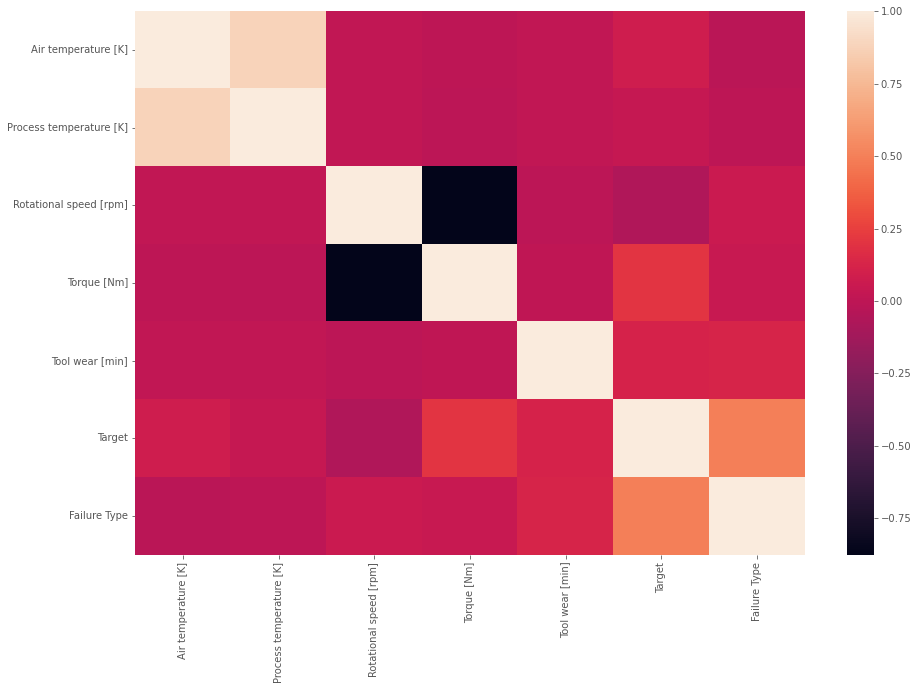

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr())

In [23]:
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,300.011586,310.012114,1539.653429,39.972071,108.132714,0.035000,1.044429
std,2.003848,1.490338,179.218050,9.988214,63.787906,0.183793,0.398809
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000
25%,298.400000,308.800000,1424.000000,33.200000,53.000000,0.000000,1.000000
50%,300.100000,310.100000,1504.000000,40.100000,107.000000,0.000000,1.000000
75%,301.500000,311.100000,1614.000000,46.700000,163.000000,0.000000,1.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,5.000000


In [24]:
df.drop(df.columns[-2],axis=1,inplace=True)

In [25]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
7879,M,300.8,312.3,1535,40.3,71,1
1919,L,298.2,308.0,1658,30.0,3,1
6524,L,301.1,310.4,1874,24.8,47,1
2847,L,300.4,309.3,1525,39.6,202,1
7464,L,300.1,311.3,1535,42.3,92,1


In [26]:
df[df.columns[-1]].value_counts()

1    6746
0      75
3      66
2      61
5      37
4      15
Name: Failure Type, dtype: int64

In [27]:
df.Type.value_counts()

L    4192
M    2113
H     695
Name: Type, dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
df=pd.get_dummies(df,drop_first=True)

In [30]:
X_test = pd.get_dummies(X_test,drop_first=True)

In [31]:
X_test.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Type_L,Type_M
4960,303.9,312.7,1339,62.3,156,0,1,1,0
129,298.9,308.5,1559,34.3,126,0,1,1,0
6555,301.5,310.7,1394,46.7,130,0,1,0,0
2620,299.4,309.2,1556,35.7,75,0,1,1,0
3301,301.3,310.5,1365,47.7,70,0,1,1,0


In [32]:
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

In [33]:
df=df.sample(frac=1).reset_index(drop=True)

In [34]:
df.columns=df.columns.astype("str")

In [35]:
col_name=df.columns.to_list()

In [36]:
col_name

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Failure Type',
 'Type_L',
 'Type_M']

In [37]:
target_col=col_name.pop(-3)

In [38]:
feature_col=col_name

In [39]:
target_col

'Failure Type'

In [40]:
feature_col

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Type_L',
 'Type_M']

In [41]:
y=df["Failure Type"].values

# Implementing Oversampling Due to Data Imbalance

In [42]:
from imblearn.combine import SMOTETomek
from collections import Counter

In [43]:
df_train=df.drop(df.columns[-3],axis=1)

In [44]:
df_train_val=df_train.values

In [45]:
smk=SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(df_train_val,y)

In [46]:
X_res.shape,y_res.shape

((40396, 7), (40396,))

In [47]:
print(f"Orignal Dataset Shape {Counter(y)}")
print(f"Resampled Dataset Shape {Counter(y_res)}")

Orignal Dataset Shape Counter({1: 6746, 0: 75, 3: 66, 2: 61, 5: 37, 4: 15})
Resampled Dataset Shape Counter({2: 6746, 0: 6743, 3: 6737, 4: 6735, 5: 6729, 1: 6706})


In [48]:
df_new=pd.concat([pd.DataFrame(X_res),pd.DataFrame(y_res)],axis=1)

In [49]:
df_new.head()

,0,1,2,3,4,5,6,0
0,302.4,310.9,1469.0,41.6,124.0,0.0,1.0,1
1,297.3,308.6,1586.0,37.7,155.0,1.0,0.0,1
2,301.7,310.7,1542.0,40.0,188.0,1.0,0.0,1
3,297.1,308.7,1474.0,42.3,64.0,1.0,0.0,1
4,302.1,311.0,1711.0,28.7,83.0,0.0,1.0,1


In [50]:
col_new=df_train.columns
col_new=col_new.to_list()
col_new.append(target_col)
df_new.columns=col_new
df_new.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_L,Type_M,Failure Type
0,302.4,310.9,1469.0,41.6,124.0,0.0,1.0,1
1,297.3,308.6,1586.0,37.7,155.0,1.0,0.0,1
2,301.7,310.7,1542.0,40.0,188.0,1.0,0.0,1
3,297.1,308.7,1474.0,42.3,64.0,1.0,0.0,1
4,302.1,311.0,1711.0,28.7,83.0,0.0,1.0,1


In [51]:
#import plotly.plotly as py
! pip install chart-studio
from chart_studio import plotly

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11431 sha256=67437953341f25dc3b3571b5964792d0ec836f20f20b6ccfff95a7d0859e2c8f
  Stored in directory: c:\users\sonu\appdata\local\pip\cache\wheels\ce\18\7f\e9527e3e66db1456194ac7f61eb3211068c409edceecff2d31
Successfully built retrying


# ❔ Checking for outliers

In [53]:
from plotly import __version__ 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

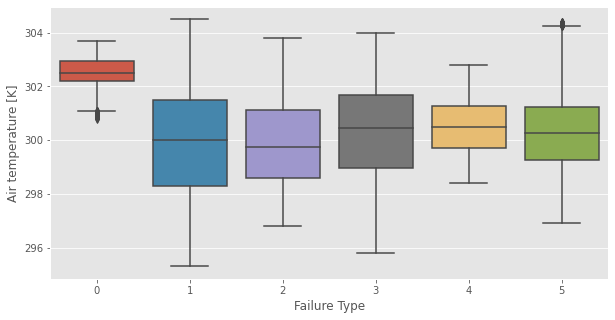

In [54]:
## Checking in Air Temp
mpl_fig = plt.figure(figsize=(10,5))

sns.boxplot(y=feature_col[0],x="Failure Type",data=df_new)

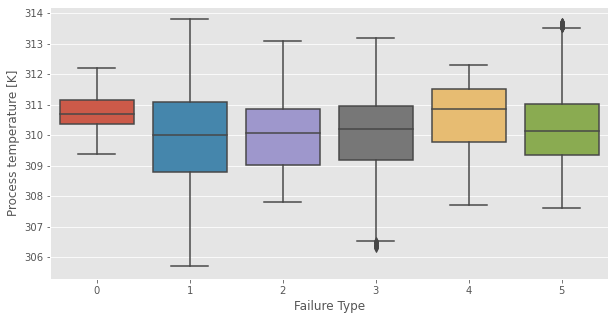

In [55]:
## Checking in Process Temp
plt.figure(figsize=(10,5))
sns.boxplot(y=feature_col[1],x="Failure Type",data=df_new)

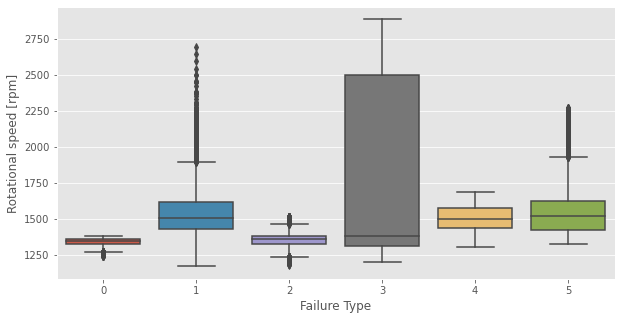

In [56]:
## Checking in Rotational Speed

plt.figure(figsize=(10,5))
sns.boxplot(y=feature_col[2],x="Failure Type",data=df_new)

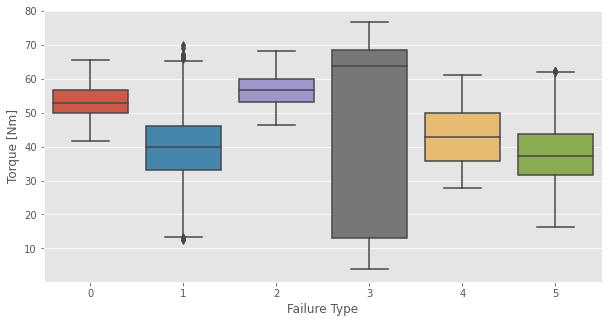

In [57]:
## Checking in Torque
plt.figure(figsize=(10,5))
sns.boxplot(y=feature_col[3],x="Failure Type",data=df_new)

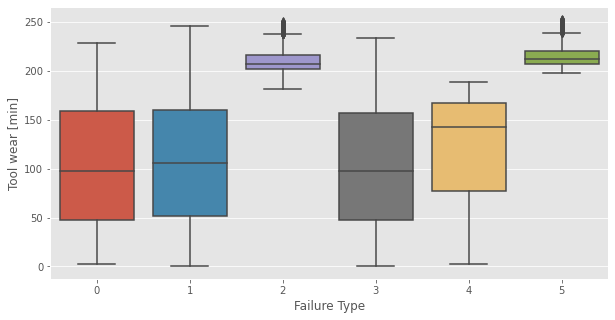

In [58]:
## Checking in Tool wear
plt.figure(figsize=(10,5))
sns.boxplot(y=feature_col[4],x="Failure Type",data=df_new)

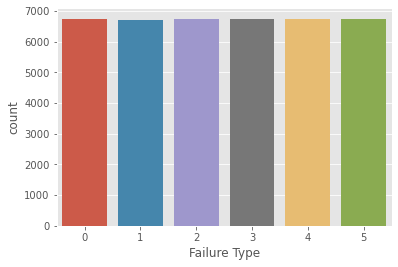

In [59]:
sns.countplot(x="Failure Type",data=df_new)

In [60]:
# As the data here is imbalanced we need to use 
y_res

array([1, 1, 1, ..., 5, 5, 5])

# Using Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
import warnings
warnings.filterwarnings('ignore')
acc_log=[]

In [62]:
# ## Building a Classification model using 
# kf=model_selection.StratifiedKFold(n_splits=5)
# for fold , (trn_,val_) in enumerate(kf.split(X=df_new,y=y_res)):
    
#     X_train=df_new.loc[trn_,feature_col]
#     y_train=df_new.loc[trn_,target_col]
    
#     X_valid=df_new.loc[val_,feature_col]
#     y_valid=df_new.loc[val_,target_col]
    
#     ro_scaler=RobustScaler()
#     X_train=ro_scaler.fit_transform(X_train)
#     X_valid=ro_scaler.transform(X_valid)
    
#     clf=LogisticRegression()
#     clf.fit(X_train,y_train)
#     y_pred=clf.predict(X_valid)
#     print(f"The fold is : {fold} : ")
#     print(classification_report(y_valid,y_pred))
#     acc=roc_auc_score(y_valid,y_pred)
#     acc_log.append(acc)
#     print(f"The accuracy for {fold} : {acc}")
#     pass
    

# Using Naive Bayes

In [63]:
X_test[target_col].values

array([1, 1, 1, ..., 1, 1, 1])

In [64]:
X_test.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Type_L,Type_M
4960,303.9,312.7,1339,62.3,156,0,1,1,0
129,298.9,308.5,1559,34.3,126,0,1,1,0
6555,301.5,310.7,1394,46.7,130,0,1,0,0
2620,299.4,309.2,1556,35.7,75,0,1,1,0
3301,301.3,310.5,1365,47.7,70,0,1,1,0


In [65]:
X_test[target_col].values

array([1, 1, 1, ..., 1, 1, 1])

In [66]:
from sklearn.naive_bayes import GaussianNB
acc_Gauss=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_new,y=y_res)):
    
    X_train=df_new.loc[trn_,feature_col]
    y_train=df_new.loc[trn_,target_col]
    
    X_valid=df_new.loc[val_,feature_col]
    y_valid=df_new.loc[val_,target_col]
    
    ro_scaler=RobustScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    x_test_split=ro_scaler.transform(X_test[feature_col])
    
    clf=GaussianNB()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(x_test_split)
    print(f"The fold is : {fold} : ")
    #print(X_train[target_col].values)
    print(y_pred)
    print(classification_report(X_test[target_col].values,y_pred))
#     acc=roc_auc_score(y_valid,y_pred,multi_class="ovo")
#     acc_Gauss.append(acc)
#     print(f"The accuracy for {fold} : {acc}")
    
    pass

The fold is : 0 : 
[0 4 4 ... 4 1 1]
              precision    recall  f1-score   support

           0       0.27      0.86      0.42        37
           1       1.00      0.47      0.64      2906
           2       0.18      1.00      0.31        17
           3       0.10      0.79      0.18        29
           4       0.00      0.00      0.00         3
           5       0.03      0.88      0.06         8

    accuracy                           0.48      3000
   macro avg       0.27      0.67      0.27      3000
weighted avg       0.97      0.48      0.63      3000

The fold is : 1 : 
[0 4 4 ... 4 1 1]
              precision    recall  f1-score   support

           0       0.28      0.86      0.42        37
           1       1.00      0.47      0.64      2906
           2       0.18      1.00      0.30        17
           3       0.10      0.79      0.18        29
           4       0.00      0.00      0.00         3
           5       0.03      0.88      0.06         8

   

# Using SVM(Support Vector Machines)
### We need to choose the best Kernel according to our need.

- #### The linear kernel is mostly preferred for text classification problems as it performs well for large datasets. 
- #### Gaussian kernels tend to give good results when there is no additional information regarding data that is not available.
- #### Rbf kernel is also a kind of Gaussian kernel which projects the high dimensional data and then searches a linear separation for it.
- #### Polynomial kernels give good results for problems where all the training data is normalized. 


In [67]:
from sklearn.svm import SVC
acc_svm=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_new,y=y_res)):
    
    X_train=df_new.loc[trn_,feature_col]
    y_train=df_new.loc[trn_,target_col]
    
    X_valid=df_new.loc[val_,feature_col]
    y_valid=df_new.loc[val_,target_col]
    
    ro_scaler=RobustScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    x_test_split=ro_scaler.transform(X_test[feature_col])
    
    clf=SVC(kernel="linear")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(x_test_split)
    print(f"The fold is : {fold} : ")
    print(classification_report(X_test[target_col].values,y_pred))
#     acc=accuracy_score(y_valid,y_pred)
#     acc_svm.append(acc)
#     print(f"The accuracy for {fold} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.35      1.00      0.52        37
           1       1.00      0.60      0.75      2906
           2       0.45      0.88      0.60        17
           3       0.50      1.00      0.67        29
           4       0.00      0.33      0.00         3
           5       0.03      1.00      0.07         8

    accuracy                           0.61      3000
   macro avg       0.39      0.80      0.43      3000
weighted avg       0.98      0.61      0.74      3000

The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.36      1.00      0.52        37
           1       1.00      0.60      0.75      2906
           2       0.45      0.88      0.60        17
           3       0.50      1.00      0.67        29
           4       0.00      0.33      0.00         3
           5       0.04      1.00      0.07         8

    accuracy                           

In [68]:
# from sklearn.svm import SVC
# acc_svm_sig=[]
# kf=model_selection.StratifiedKFold(n_splits=5)
# for fold , (trn_,val_) in enumerate(kf.split(X=df_new,y=y_res)):
    
#     X_train=df_new.loc[trn_,feature_col]
#     y_train=df_new.loc[trn_,target_col]
    
#     X_valid=df_new.loc[val_,feature_col]
#     y_valid=df_new.loc[val_,target_col]
    
#     ro_scaler=RobustScaler()
#     X_train=ro_scaler.fit_transform(X_train)
#     X_valid=ro_scaler.transform(X_valid)
    
#     clf=SVC(kernel="sigmoid")
#     clf.fit(X_train,y_train)
#     y_pred=clf.predict(X_valid)
#     print(f"The fold is : {fold} : ")
#     print(classification_report(y_valid,y_pred))
# #     acc=accuracy_score(y_valid,y_pred)
# #     acc_svm_sig.append(acc)
# #     print(f"The accuracy for {fold} : {acc}")

In [69]:
from sklearn.svm import SVC
acc_svm_rbf=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_new,y=y_res)):
    
    X_train=df_new.loc[trn_,feature_col]
    y_train=df_new.loc[trn_,target_col]
    
    X_valid=df_new.loc[val_,feature_col]
    y_valid=df_new.loc[val_,target_col]
    
    ro_scaler=RobustScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    x_test_split=ro_scaler.transform(X_test[feature_col])
    clf=SVC(kernel="rbf")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(x_test_split)
    print(f"The fold is : {fold} : ")
    print(classification_report(X_test[target_col].values,y_pred))
#     acc=accuracy_score(y_valid,y_pred)
#     acc_svm_rbf.append(acc)
#     print(f"The accuracy for {fold} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.41      1.00      0.58        37
           1       1.00      0.80      0.89      2906
           2       0.42      0.94      0.58        17
           3       0.58      0.97      0.73        29
           4       0.00      0.00      0.00         3
           5       0.03      0.62      0.06         8

    accuracy                           0.80      3000
   macro avg       0.41      0.72      0.47      3000
weighted avg       0.98      0.80      0.88      3000

The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.41      1.00      0.58        37
           1       1.00      0.80      0.89      2906
           2       0.41      0.94      0.57        17
           3       0.56      0.97      0.71        29
           4       0.00      0.00      0.00         3
           5       0.03      0.62      0.06         8

    accuracy                           

In [70]:
from sklearn.svm import SVC
acc_svm_poly=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_new,y=y_res)):
    
    X_train=df_new.loc[trn_,feature_col]
    y_train=df_new.loc[trn_,target_col]
    
    X_valid=df_new.loc[val_,feature_col]
    y_valid=df_new.loc[val_,target_col]
    
    ro_scaler=RobustScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    x_test_split=ro_scaler.transform(X_test[feature_col])
    clf=SVC(kernel="poly")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(x_test_split)
    print(f"The fold is : {fold} : ")
    print(classification_report(X_test[target_col].values,y_pred))
#     acc=accuracy_score(y_valid,y_pred)
#     acc_svm_poly.append(acc)
#     print(f"The accuracy for {fold} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.29      0.81      0.42        37
           1       1.00      0.66      0.79      2906
           2       0.15      1.00      0.27        17
           3       0.54      0.86      0.67        29
           4       0.00      0.00      0.00         3
           5       0.02      0.50      0.05         8

    accuracy                           0.66      3000
   macro avg       0.33      0.64      0.37      3000
weighted avg       0.97      0.66      0.78      3000

The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.31      0.84      0.46        37
           1       1.00      0.66      0.79      2906
           2       0.14      1.00      0.25        17
           3       0.58      0.90      0.70        29
           4       0.00      0.00      0.00         3
           5       0.02      0.50      0.04         8

    accuracy                           

# Using  KNN
## The optimal K value usually found is the square root of N, where N is the total number of samples.

In [71]:
from sklearn.neighbors import KNeighborsClassifier
acc_KNN=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_new,y=y_res)):
    
    X_train=df_new.loc[trn_,feature_col]
    y_train=df_new.loc[trn_,target_col]
    
    X_valid=df_new.loc[val_,feature_col]
    y_valid=df_new.loc[val_,target_col]
    
    ro_scaler=RobustScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    x_test_split=ro_scaler.transform(X_test[feature_col])
    clf=KNeighborsClassifier(n_neighbors=4)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(x_test_split)
    print(f"The fold is : {fold} : ")
    print(classification_report(X_test[target_col].values,y_pred))
#     acc=accuracy_score(y_valid,y_pred)
#     acc_KNN.append(acc)
#     print(f"The accuracy for {fold} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.32      0.73      0.44        37
           1       0.99      0.91      0.95      2906
           2       0.32      0.88      0.47        17
           3       0.50      0.66      0.57        29
           4       0.00      0.00      0.00         3
           5       0.01      0.12      0.02         8

    accuracy                           0.90      3000
   macro avg       0.36      0.55      0.41      3000
weighted avg       0.97      0.90      0.93      3000

The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.36      0.81      0.50        37
           1       0.99      0.91      0.95      2906
           2       0.31      0.88      0.46        17
           3       0.46      0.66      0.54        29
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         8

    accuracy                           

# 🌲 Using Decission tree Classifier 

In [72]:
from sklearn.tree import DecisionTreeClassifier
acc_Dtree=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_new,y=y_res)):
    
    X_train=df_new.loc[trn_,feature_col]
    y_train=df_new.loc[trn_,target_col]
    
    X_valid=df_new.loc[val_,feature_col]
    y_valid=df_new.loc[val_,target_col]
    
    ro_scaler=RobustScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    x_test_split=ro_scaler.transform(X_test[feature_col])
    clf=DecisionTreeClassifier(criterion="entropy")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(x_test_split)
    print(f"The fold is : {fold} : ")
    print(classification_report(X_test[target_col].values,y_pred))
#     acc=accuracy_score(y_valid,y_pred)
#     acc_Dtree.append(acc)
#     print(f"The accuracy for {fold} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.72      0.70      0.71        37
           1       0.99      0.96      0.98      2906
           2       0.67      0.82      0.74        17
           3       0.87      0.90      0.88        29
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         8

    accuracy                           0.96      3000
   macro avg       0.54      0.56      0.55      3000
weighted avg       0.98      0.96      0.97      3000

The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.74      0.86      0.80        37
           1       0.99      0.96      0.98      2906
           2       0.79      0.88      0.83        17
           3       0.76      0.90      0.83        29
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         8

    accuracy                           

In [73]:
# import time
# while True:
#     print("5")
#     time.sleep(60)

# 🚄 Using Random Forest Classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier
acc_RandF=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_new,y=y_res)):
    
    X_train=df_new.loc[trn_,feature_col]
    y_train=df_new.loc[trn_,target_col]
    
    X_valid=df_new.loc[val_,feature_col]
    y_valid=df_new.loc[val_,target_col]
    
    ro_scaler=RobustScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    x_test_split=ro_scaler.transform(X_test[feature_col])
    clf=RandomForestClassifier(n_estimators=55,criterion="entropy")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(x_test_split)
    print(f"The fold is : {fold} : ")
    print(classification_report(X_test[target_col].values,y_pred))
#     acc=accuracy_score(y_valid,y_pred)
#     acc_RandF.append(acc)
#     print(f"The accuracy for {fold} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.71      0.78      0.74        37
           1       0.99      0.97      0.98      2906
           2       0.60      0.88      0.71        17
           3       0.68      0.90      0.78        29
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         8

    accuracy                           0.96      3000
   macro avg       0.50      0.59      0.54      3000
weighted avg       0.98      0.96      0.97      3000

The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.75      0.81      0.78        37
           1       0.99      0.97      0.98      2906
           2       0.60      0.88      0.71        17
           3       0.65      0.90      0.75        29
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         8

    accuracy                           

# 🚄 Using XGBoost

In [75]:
class_failure=encode.classes_

In [76]:
class_failure

array(['Heat Dissipation Failure', 'No Failure', 'Overstrain Failure',
       'Power Failure', 'Random Failures', 'Tool Wear Failure'],
      dtype=object)

In [77]:
# Checking the best accuracy in K-SVM using which Kernel;
fold_list=["Fold 1","Fold 2","Fold 3","Fold 4","Fold 5"]


In [79]:
from xgboost import XGBClassifier
acc_XGB=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_new,y=y_res)):
    
    X_train=df_new.loc[trn_,feature_col]
    y_train=df_new.loc[trn_,target_col]
    
    X_valid=df_new.loc[val_,feature_col]
    y_valid=df_new.loc[val_,target_col]
    
    ro_scaler=RobustScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    x_test_split=ro_scaler.transform(X_test[feature_col])
    clf=XGBClassifier()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(x_test_split)
    print(f"The fold is : {fold} : ")
    print(classification_report(X_test[target_col].values,y_pred))
#     acc=accuracy_score(y_valid,y_pred)
#     acc_XGB.append(acc)
#     print(f"The accuracy for {fold} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.88      0.78      0.83        37
           1       0.99      0.98      0.98      2906
           2       0.70      0.94      0.80        17
           3       0.87      0.93      0.90        29
           4       0.00      0.00      0.00         3
           5       0.03      0.12      0.04         8

    accuracy                           0.97      3000
   macro avg       0.58      0.63      0.59      3000
weighted avg       0.99      0.97      0.98      3000

The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.90      0.97      0.94        37
           1       1.00      0.97      0.98      2906
           2       0.65      0.88      0.75        17
           3       0.76      0.90      0.83        29
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         8

    accuracy                           

In [ ]:
import pickle
with open("XG_boost_pkl","wb") as files:
    pickle.dump(clf,files)


# 🔚 Summary
### As we can see from the 97% AUC that we obtained using Random Forest as well as XGBoost